# What is the True Normal Human Body Temperature? 

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In this exercise, we will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance in order to answer the following questions:

##### 1. Is the distribution of body temperatures normal? 

- Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    - Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test


##### 2. Is the sample size large? Are the observations independent?

- Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 


##### 3. Is the true population mean really 98.6 degrees F?

- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the $t$ or $z$ statistic? 
- Now try using the other test. How is the result be different? Why?


##### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

- Which one is the correct one to use? 
- What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?


##### 5. At what temperature should we consider someone's temperature to be "abnormal"?

- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in 


##### 6. Is there a significant difference between males and females in normal temperature?

- What testing approach did you use and why?
- Write a story with your conclusion in the context of the original problem.

In [2]:
# Read in data
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

In order to determine if the distribution of the temperatures are normal, we will create a large sample of normally distributed temperatures using the mean and standard deviation of our dataset.  We will compare the probability density function of our dataset to the sample as well as the cumulative distribution function to see if our dataset and sample align.  Finally, we will look at a normal probability plot to see how the temperatures align with one another.

#### Compare probability density functions (PDFs) from data of body temperature and simulated normal distribution

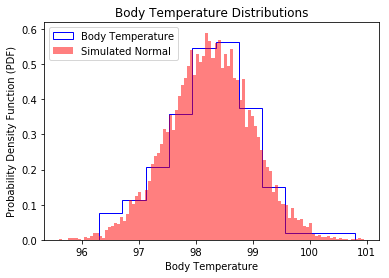

In [3]:
# Extract temperature data
temp = df['temperature']

# Find mean and standard deviation for simulating the normal distribution
mean = np.mean(temp)
std = np.std(temp)

# Acquire a large set of samples
np.random.seed(10)
norm = np.random.normal(mean, std, size=10000)

# Plot body temperature PDF 
_ = plt.hist(temp, bins=int(np.sqrt(len(temp))), density=True, histtype='step', color='blue', alpha=1)

# Plot simulated normal distribution PDF
_ = plt.hist(norm, bins=int(np.sqrt(len(norm))), density=True, histtype='bar', color='red', alpha=0.5)

# Add axis and labels
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Probability Density Function (PDF)')
_ = plt.legend(('Body Temperature','Simulated Normal'), loc='upper left')
_ = plt.title('Body Temperature Distributions')

#### Compare cumulative distribution functions (CDFs) from data of body temperature and simulated normal distribution

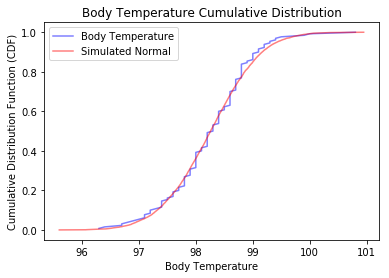

In [4]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


# Compute ECDF from data of body temperature and the simulated normal distribution
x_temp, y_temp = ecdf(temp)
x_norm, y_norm = ecdf(norm)

# Plot ECDF from data of body temperature and the simulated normal distribution
_ = plt.plot(x_temp, y_temp, color='blue', alpha=0.5)
_ = plt.plot(x_norm, y_norm, color='red', alpha=0.5)

# Add axis and labels
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Cumulative Distribution Function (CDF)')
_ = plt.legend(('Body Temperature', 'Simulated Normal'), loc='upper left')
_ = plt.title('Body Temperature Cumulative Distribution')

#### Assess normal probability plot of body temperature data

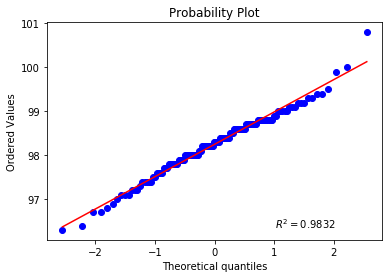

In [5]:
_ = stats.probplot(temp, plot=plt, fit=True, rvalue=True)

#### Conclusion

In response the first question, the temperatures are normally distributed.  The histogram is practically symmetric while both the PDF and CDF, as well as the Probability Plot, show an alignment of distribution with both the dataset of body temperature and simulated samples of body temperature.

### 2. Is the sample size large? Are the observations independent?

In [6]:
print('The sample size is comprised of {} samples.'.format(len(df)))

The sample size is comprised of 130 samples.


- The sample size is larger than 30, which is generally considered to be the threshold between a large and small sample size; statistically.



- Because the sample is used to estimate the true temperature of the population, the entire human race, it is much less than 10% of the population.  By rule of thumb, a sample is considered independent if it is drawn with replacement or is 10% or less of the population size.  This means that the observations are considered independent.

### 3. Is the true population mean really 98.6 degrees F?

 In order answer this question, we have to define a couple of variables:
 - Null Hypothesis: *the true population mean is 98.6 degrees F*
 - Alternative Hypothesis: *the true population mean is not 98.6 degrees F*
 - Test Statistic: *mean*
 - Method: *one sample (body temperature)*
 - Significance Level: *$\alpha$ = 0.05*

#### Bootstrap method

In [7]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates of 1D data."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))

    return bs_replicates


# Define hypothesized population mean
population_mean = 98.6

# Shift body temperature data to match its mean with hypothesized true mean
temp_shifted = temp - np.mean(temp) + population_mean

# Get bootstrap replicates from the shifted temperature data
bs_reps = draw_bs_reps(temp_shifted, np.mean, 10000)

# Calculate p-value
p = np.sum(bs_reps <= np.mean(temp))/len(bs_reps)

print("The p-value is {}".format(p))

The p-value is 0.0


The p-value is smaller than the significance level, $\alpha$, as it is near 0.  This suggests that it is near impossible to retrieve a sample mean from the population that equals the mean body temperature observed in the sample dataset if the null hypothesis is true.  Thus, the null hypothesis will be rejected and the true population mean is not 98.6 degrees F.

#### Frequentist Statistical Testing

Now we will try using frequentist statistical testing:
 - Null Hypothesis: *the true population mean is 98.6 degrees F*
 - Alternative Hypothesis: *the true population mean is not 98.6 degrees F*
 - Test Statistic: *T-Test since we are looking for the mean.  T and Z tests are both valid but since we do not know the standard deviation of the population, we will substitute the standard deviation of the sample in place.  Thus a T-Test is better to use over a Z-Test.  Also, since the sample size is larger, T score will start to approach Z score.*
 - Method: *one sample, one set of measurement (body temperature)*
 - Significance Level: *$\alpha$=0.05*

#### T-Test for P-Value

In [8]:
# Find mean and standard deviation for simulating the normal distribution
mean = np.mean(temp)
std = np.std(temp)

# Define hypothesized population mean
population_mean = 98.6

# Compute standard error of sample mean
std_mean = std/np.sqrt(len(temp))

# Calculate T-Statistic
t = (mean - population_mean) / std_mean

# Calculate degree of freedom
degree = len(temp) - 1

print('t-statistic is {} \ndegree of freedom is {}'.format(t, degree))

t-statistic is -5.475925202078116 
degree of freedom is 129


p-value for one tail test with a degree of freedom of 129:

p(t <= -5.476) < 0.0005

In [9]:
# Using scipy to find P-Value
p = stats.t.cdf(mean, degree, loc=population_mean, scale=std_mean)

print('p-value is {}'.format(p))

p-value is 1.0943732312047587e-07


In [10]:
# Using scipy to find T-Statistic and P-Value
t,p = stats.ttest_1samp(temp, population_mean)

# Convert Two-Tail to One-Tail
p = p/2 

print('t-statistic is {} \np-value is {}'.format(t,p))

t-statistic is -5.4548232923645195 
p-value is 1.2053160207780638e-07


The p-value using the t-table and scipy both show that p < 𝛼 and suggests that the null hypothesis should be rejected, and the alternative hypothesis, the true population mean is not 98.6 degrees F, accepted.

#### Z-Test for P-Value

In [11]:
# Substitute sample standard deviation to estimate population standard deviation
z = (mean - population_mean) / std_mean

print('z-statistic is {}'.format(z))

z-statistic is -5.475925202078116


p-value for one tail test:

p(z <= -5.476) < 0.00001

In [12]:
# Using scipy to find p value
p = stats.norm.cdf(mean, loc=population_mean, scale=std_mean)

print('p-value is {}'.format(p))

p-value is 2.1761575829410943e-08


The p-value from the z-table also rejects the null hypothesis.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [13]:
# Reproduce random results
np.random.seed(10)

# Draw a small sample of size 10
temp_10 = np.random.choice(temp, size=10)

 In order answer this question, we have to define a couple of variables:
 - Null Hypothesis: *the true population mean is 98.6 degrees F*
 - Alternative Hypothesis: *the true population mean is not 98.6 degrees F*
 - Test Statistic: *T-Test, then Z-Test*
 - Method: *one sample (body temperature)*
 - Significance Level: *$\alpha$=0.05*

#### T-Test for P-Value

In [14]:
# Find sample mean and standard deviation
mean_10 = np.mean(temp_10)
std_10 = np.std(temp_10)

# Define hypothesized population mean
population_mean = 98.6

# Compute standard error of sample mean
std_mean_10 = std_10/np.sqrt(len(temp_10))

# Calculate T-Statistic
t = (mean_10 - population_mean) / std_mean_10

# Calculate degree of freedom
degree = len(temp_10) - 1

print('t-statistic is {} \ndegree of freedom is {}'.format(t, degree))

t-statistic is -0.5980209079213772 
degree of freedom is 9


p-value for one tail test with a degree of freedom of 9:

p(t <= -0.5980) is between 0.25 and 0.30

In [15]:
# Using scipy to find p value
p = stats.t.cdf(mean_10, degree, loc=population_mean, scale=std_mean_10)

print('p-value is {}'.format(p))

p-value is 0.28228464062498676


The p-value using the t-table and scipy both show that p > 𝛼 and suggests that the null hypothesis, the true population mean is 98.6 degrees F, should not be rejected.

#### Z-Test for P-Value

In [16]:
# Substitute sample standard deviation to estimate population standard deviation
z = (mean_10 - population_mean) / std_mean_10

print('z-statistic is {}'.format(z))

z-statistic is -0.5980209079213772


p-value for one tail test:

p(z <= -0.5980) is between 0.2776 and 0.2743

In [17]:
# Using scipy to find p value
p = stats.norm.cdf(mean_10, loc=population_mean, scale=std_mean_10)

print('p-value is {}'.format(p))

p-value is 0.2749129911989777


The p-value using the z-table and scipy both show that p > 𝛼 and suggests that the null hypothesis, the true population mean is 98.6 degrees F, should not be rejected.

#### Conclusion

For smaller sample sizes of 10, p-values from the t & z tables did not show a large difference, 0.2822 vs 0.2750.  Although it could have been from the random seeding used.


For smaller sample sizes ( < 30 ), the sampling distribution of the sample mean is less than the normal distribution and a t-table should be used if the sample standard deviation is used to estimate the population standard deviation. For larger sample sizes ( > 30 ), the sampling distribution of the sample mean approaches normal distribution, thus, both t and z tables are valid with similar results.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

#### Boostrap method

In [18]:
## Substitute sample mean and standard deviation for population mean and standard deviation

# Acquire a large set of samples
np.random.seed(10)
temps = np.random.normal(mean,std,size=100000)

# Calculate margin of error for 95% confidence interval
# Z-Score is 1.96 threshold
error = 1.96 * np.std(temps)

# Extract 95% confidence interval
conf_int = np.percentile(temps, [2.5,97.5])

print('The margin of error is {} \nThe confidence interval at 95% is ({}, {})'
      .format(error, conf_int[0], conf_int[1]))
print('\n')
print('Someone\'s temperature should be considered "abnormal" if it is outside of {} and {} degrees F'
      .format(96.82, 99.68))

The margin of error is 1.4306694770718722 
The confidence interval at 95% is (96.81904509919418, 99.68021233567154)


Someone's temperature should be considered "abnormal" if it is outside of 96.82 and 99.68 degrees F


#### Frequentist method
We do not know the true population mean, so we will substitute the sample dataset mean in place of the population mean.

In [19]:
# The margin of error and confidence interval is for invidual temperature, therefore the sample size is 1
n = 1

# Calculate the margin of error for 95% confidence interval
# Z-Score is 1.96 threshold
error = 1.96 * std / np.sqrt(n)

# Calculate confidence interval with sample mean
conf_int = mean + np.array([-1, 1]) * error

print('The margin of error is {} \nThe confidence interval at 95% is ({}, {})'
      .format(error, conf_int[0], conf_int[1]))
print('\n')
print('Someone\'s temperature should be considered "abnormal" if it is outside of {} and {} degrees F'
      .format(96.82, 99.68))

The margin of error is 1.431501246653874 
The confidence interval at 95% is (96.8177295225769, 99.68073201588466)


Someone's temperature should be considered "abnormal" if it is outside of 96.82 and 99.68 degrees F


<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

### 6. Is there a significant difference between males and females in normal temperature?

In [20]:
# Extract temperature data for each gender
male = df[df['gender']=='M']['temperature']
female = df[df['gender']=='F']['temperature']
mean_male = np.mean(male)
mean_female = np.mean(female)

print('male sample size = {} \nfemale sample size = {}'.format(len(male), len(female)))

male sample size = 65 
female sample size = 65


#### Hacker Statistics using Permutation

Permutation testing is preferred because it checks if the two groups share the same mean and has similar distribution.


Significane level: $\alpha$ = 0.05

Null Hypothesis: *there is no significant difference between male and female normal temperature*

- $\mu(male)$ - $\mu(female)$ = 0


In [21]:
# Combine two datasets
concat_sample = np.concatenate((male, female))

# Initialize an array to store all the bootstrap replicates
bs_reps = np.empty(10000)

# Generate large number of bootstrap replicates
for i in range(10000): 
    
    # Randomize permuted order
    permuted = np.random.permutation(concat_sample) 
    
    # Split permuted array and assign to male and female groups
    permuted_male = permuted[:len(male)]
    permuted_female = permuted[len(male):]
    
    # Calculate difference of means
    bs_reps[i] = np.mean(permuted_male) - np.mean(permuted_female)
    
# Calculate difference between male temperature and female temperature mean
mean_diff = mean_male - mean_female

# Calculate the p-value based on the number of replicates that are as extreme as the observed the sample
p = np.sum(bs_reps < mean_diff)/len(bs_reps)

#print the p-value
print('The p-value is {}'.format(p))

The p-value is 0.0137


The mean normal body temperature was held to be 37 degrees C or 98.6 degrees F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But in 1992, Mackowiak, Wasserman and Levine suggested that the actual normal body temperature is a little bit lower.  Also, as verified by our own tests, male and female normal body temperature are statistically significant from each other.

##### Resources
Information and data sources: 
- http://www.amstat.org/publications/jse/datasets/normtemp.txt, 
- http://www.amstat.org/publications/jse/jse_data_archive.htm